In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as matplot
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn import cross_validation
from IPython.display import display
from sklearn.metrics import classification_report,confusion_matrix
from imblearn.datasets import make_imbalance
from sklearn.preprocessing import StandardScaler


/Users/sdhankhad/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [56]:
%matplotlib inline
#Import basic packages
import numpy as np 
import pandas as pd
import matplotlib as matplot
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn import cross_validation
from IPython.display import display
from sklearn.metrics import classification_report,confusion_matrix

In [57]:
train= pd.read_csv('creditcard.csv')
train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [58]:
from sklearn.preprocessing import StandardScaler
train['Amount_n']= StandardScaler().fit_transform(train['Amount'].reshape(-1,1))

/Users/sdhankhad/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [59]:
train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Amount_n
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.073403


In [60]:
train= train.drop(['Time','Amount'], axis=1)
train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Amount_n
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [61]:
X= train.ix[:, train.columns != 'Class']
y= train.ix[:, train.columns == 'Class']
fraud_count = len(train[train.Class == 1])
fraud_indices = train[train.Class == 1].index
normal_indices = train[train.Class == 0].index

r_normal_indices = np.random.choice(normal_indices, fraud_count, replace = False) # random 

undersample_indices = np.concatenate([fraud_indices,r_normal_indices])
undersample_train = train.iloc[undersample_indices,:]

X_undersample = undersample_train.ix[:, undersample_train.columns != 'Class']
y_undersample = undersample_train.ix[:, undersample_train.columns == 'Class']


/Users/sdhankhad/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.
/Users/sdhankhad/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  if sys.path[0] == '':


In [62]:
from sklearn.model_selection import train_test_split
X_tr, X_test, y_tr, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)
X_train_res, X_test_res, y_train_res, y_test_res= train_test_split(X_undersample,y_undersample,test_size = 0.3,random_state = 0)

In [63]:
#Logistic Regression
lr=LogisticRegression()
lr.fit(X_train_res,y_train_res)
testscoreLR=accuracy_score(y_test_res,lr.predict(X_test_res))
print('logistic regression accuracy score:'+str(testscoreLR))
print(confusion_matrix(y_test_res,lr.predict(X_test_res)))
print(classification_report(y_test_res,lr.predict(X_test_res)))

logistic regression accuracy score:0.942567567568
[[144   5]
 [ 12 135]]
             precision    recall  f1-score   support

          0       0.92      0.97      0.94       149
          1       0.96      0.92      0.94       147

avg / total       0.94      0.94      0.94       296



In [64]:
#Decision tree
from sklearn import tree
dt = tree.DecisionTreeClassifier(max_depth=3)
dt.fit(X_train_res,y_train_res)
testscoreDT=accuracy_score(y_test_res,dt.predict(X_test_res))
print('Decision Tree accuracy score:'+str(testscoreDT))
print(confusion_matrix(y_test_res,dt.predict(X_test_res)))
print(classification_report(y_test_res,dt.predict(X_test_res)))

Decision Tree accuracy score:0.929054054054
[[144   5]
 [ 16 131]]
             precision    recall  f1-score   support

          0       0.90      0.97      0.93       149
          1       0.96      0.89      0.93       147

avg / total       0.93      0.93      0.93       296



In [65]:
#Decision tree
from sklearn import tree
dt = tree.DecisionTreeClassifier(max_depth=8)
dt.fit(X_train_res,y_train_res)
testscoreDT=accuracy_score(y_test_res,dt.predict(X_test_res))
print('Decision Tree accuracy score:'+str(testscoreDT))
print(confusion_matrix(y_test_res,dt.predict(X_test_res)))
print(classification_report(y_test_res,dt.predict(X_test_res)))

Decision Tree accuracy score:0.915540540541
[[135  14]
 [ 11 136]]
             precision    recall  f1-score   support

          0       0.92      0.91      0.92       149
          1       0.91      0.93      0.92       147

avg / total       0.92      0.92      0.92       296



In [66]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators=100)
rf.fit(X_train_res,y_train_res)
testscoreRF=accuracy_score(y_test_res,rf.predict(X_test_res))
print('Random Forest accuracy score:'+str(testscoreRF))

/Users/sdhankhad/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Random Forest accuracy score:0.949324324324


In [67]:
print(confusion_matrix(y_test_res,rf.predict(X_test_res)))
print(classification_report(y_test_res,rf.predict(X_test_res)))

[[144   5]
 [ 10 137]]
             precision    recall  f1-score   support

          0       0.94      0.97      0.95       149
          1       0.96      0.93      0.95       147

avg / total       0.95      0.95      0.95       296



In [68]:
#Gaussian navie bayers
nb=GaussianNB()
nb.fit(X_train_res,y_train_res)
testscoreNB=accuracy_score(y_test_res,nb.predict(X_test_res))
print('Decision Tree accuracy score:'+str(testscoreNB))
print(confusion_matrix(y_test_res,nb.predict(X_test_res)))
print(classification_report(y_test_res,nb.predict(X_test_res)))

Decision Tree accuracy score:0.915540540541
[[145   4]
 [ 21 126]]
             precision    recall  f1-score   support

          0       0.87      0.97      0.92       149
          1       0.97      0.86      0.91       147

avg / total       0.92      0.92      0.92       296



In [69]:
#KNN
kn=KNeighborsClassifier()
kn.fit(X_train_res,y_train_res)
testscoreKN=accuracy_score(y_test_res,kn.predict(X_test_res))
print('Decision Tree accuracy score:'+str(testscoreKN))
print(confusion_matrix(y_test_res,kn.predict(X_test_res)))
print(classification_report(y_test_res,kn.predict(X_test_res)))

Decision Tree accuracy score:0.945945945946
[[146   3]
 [ 13 134]]
             precision    recall  f1-score   support

          0       0.92      0.98      0.95       149
          1       0.98      0.91      0.94       147

avg / total       0.95      0.95      0.95       296



/Users/sdhankhad/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [70]:
from sklearn.ensemble import GradientBoostingClassifier
gbm0 = GradientBoostingClassifier(random_state=10)
gbm0.fit(X_train_res,y_train_res)
testscoreGBM=accuracy_score(y_test_res,gbm0.predict(X_test_res))
print('Decision Tree accuracy score:'+str(testscoreGBM))
print(confusion_matrix(y_test_res,gbm0.predict(X_test_res)))
print(classification_report(y_test_res,gbm0.predict(X_test_res)))

Decision Tree accuracy score:0.939189189189
[[141   8]
 [ 10 137]]
             precision    recall  f1-score   support

          0       0.93      0.95      0.94       149
          1       0.94      0.93      0.94       147

avg / total       0.94      0.94      0.94       296



In [71]:
from sklearn import svm
sv=svm.SVC()
sv.fit(X_train_res,y_train_res)
testscoreSV=accuracy_score(y_test_res,sv.predict(X_test_res))
print('SVM accuracy score:'+str(testscoreSV))
print(confusion_matrix(y_test_res,sv.predict(X_test_res)))
print(classification_report(y_test_res,sv.predict(X_test_res)))

SVM accuracy score:0.935810810811
[[141   8]
 [ 11 136]]
             precision    recall  f1-score   support

          0       0.93      0.95      0.94       149
          1       0.94      0.93      0.93       147

avg / total       0.94      0.94      0.94       296



In [72]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))
mlp.fit(X_train_res,y_train_res)
testscoreMLP=accuracy_score(y_test_res,mlp.predict(X_test_res))
print('Neural Network accuracy score:'+str(testscoreMLP))
print(confusion_matrix(y_test_res,mlp.predict(X_test_res)))
print(classification_report(y_test_res,mlp.predict(X_test_res)))

Neural Network accuracy score:0.932432432432
[[139  10]
 [ 10 137]]
             precision    recall  f1-score   support

          0       0.93      0.93      0.93       149
          1       0.93      0.93      0.93       147

avg / total       0.93      0.93      0.93       296



In [73]:
#Arrrange the model according tp there accuracy score
models = pd.DataFrame({'Model' : [ 'random Forest', 'Decision Tree', 'Logistic Regression', 'KNN Regression','Gaussian Naive Bays','XGS BOoster class.','Neural Network','SVM'],'Testing_Score' : [ testscoreRF, testscoreDT, testscoreLR, testscoreKN, testscoreNB, testscoreMLP, testscoreSV, testscoreGBM ],})
models.sort_values(by='Testing_Score', ascending=False)


,Model,Testing_Score
0,random Forest,0.949324
3,KNN Regression,0.945946
2,Logistic Regression,0.942568
7,SVM,0.939189
6,Neural Network,0.935811
5,XGS BOoster class.,0.932432
1,Decision Tree,0.915541
4,Gaussian Naive Bays,0.915541


In [74]:
#using Random Forest
importances=rf.feature_importances_
f=np.argsort(importances)[::-1]
print ('feature ranking:')
for i in range(X.shape[1]):
     print ("feature no. {}: {} ({})".format(i+1,X.columns[f[i]],importances[f[i]]))

feature ranking:
feature no. 1: V14 (0.171337350124)
feature no. 2: V10 (0.167106939627)
feature no. 3: V4 (0.0895051291192)
feature no. 4: V12 (0.0888708961729)
feature no. 5: V11 (0.0847999297786)
feature no. 6: V17 (0.0828941224532)
feature no. 7: V3 (0.0521834228515)
feature no. 8: V7 (0.0396923710329)
feature no. 9: V16 (0.0221338412481)
feature no. 10: V2 (0.0217953561732)
feature no. 11: V9 (0.0173637066924)
feature no. 12: V21 (0.0162393851427)
feature no. 13: Amount_n (0.0146078230893)
feature no. 14: V27 (0.013505028145)
feature no. 15: V20 (0.0134798596873)
feature no. 16: V19 (0.0110303327149)
feature no. 17: V1 (0.009815618398)
feature no. 18: V8 (0.00945236820064)
feature no. 19: V28 (0.00889488281023)
feature no. 20: V5 (0.00865787661611)
feature no. 21: V15 (0.00856459528447)
feature no. 22: V18 (0.00855876657369)
feature no. 23: V26 (0.00702626199127)
feature no. 24: V13 (0.00688814740073)
feature no. 25: V23 (0.00671725184707)
feature no. 26: V6 (0.00580539067621)
fea

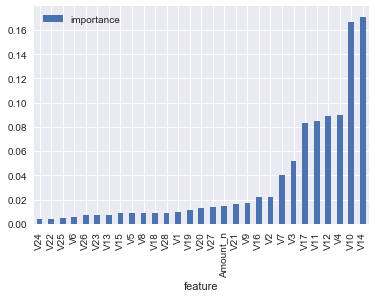

In [75]:
importances = pd.DataFrame({'feature':X_tr.columns,'importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=True).set_index('feature')
importances.plot.bar()

In [76]:
#Decision Tree
importances=dt.feature_importances_
f=np.argsort(importances)[::-1]
print ('feature ranking:')
for i in range(X.shape[1]):
     print ("feature no. {}: {} ({})".format(i+1,X.columns[f[i]],importances[f[i]]))

feature ranking:
feature no. 1: V14 (0.768890875552)
feature no. 2: V4 (0.0402297177364)
feature no. 3: V10 (0.0315295947549)
feature no. 4: V16 (0.0303586981305)
feature no. 5: V19 (0.0294575535267)
feature no. 6: V20 (0.0221281975952)
feature no. 7: V8 (0.0132535729497)
feature no. 8: V17 (0.0117497781951)
feature no. 9: Amount_n (0.0117277414421)
feature no. 10: V11 (0.00886096020067)
feature no. 11: V22 (0.00886096020067)
feature no. 12: V7 (0.00567630629084)
feature no. 13: V21 (0.00545289858502)
feature no. 14: V15 (0.00541503123374)
feature no. 15: V12 (0.00362324040055)
feature no. 16: V26 (0.00278487320592)
feature no. 17: V28 (0.0)
feature no. 18: V18 (0.0)
feature no. 19: V13 (0.0)
feature no. 20: V23 (0.0)
feature no. 21: V24 (0.0)
feature no. 22: V9 (0.0)
feature no. 23: V25 (0.0)
feature no. 24: V6 (0.0)
feature no. 25: V5 (0.0)
feature no. 26: V27 (0.0)
feature no. 27: V3 (0.0)
feature no. 28: V2 (0.0)
feature no. 29: V1 (0.0)


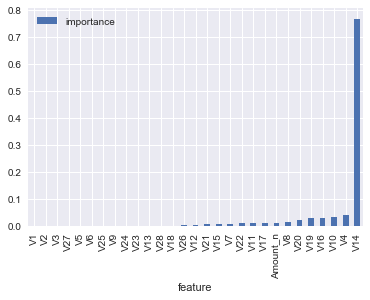

In [77]:
importances = pd.DataFrame({'feature':X_tr.columns,'importance':np.round(dt.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=True).set_index('feature')
importances.plot.bar()

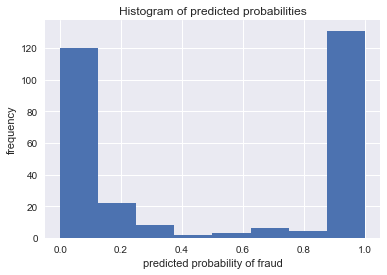

In [35]:
y_predprob_u = lr.predict_proba(X_test_res)[:, 1]  # default threshold 0.5

plt.hist(y_predprob_u, bins=8)
plt.xlabel('predicted probability of fraud')
plt.ylabel('frequency')
plt.title('Histogram of predicted probabilities') 

In [79]:
y_pred = lr.predict(X_test_res)
y_prob = lr.predict_proba(X_test_res)
y1_pred = dt.predict(X_test_res)
y1_prob = dt.predict_proba(X_test_res)
y2_prob = rf.predict_proba(X_test_res)
y3_prob = nb.predict_proba(X_test_res)
y4_prob = kn.predict_proba(X_test_res)
from sklearn.metrics import roc_curve, auc
# area under the curve
Falsepositive, truepositive,_ = (roc_curve(y_test,y_prob[:,1]))
FalsepositiveDT, truepositiveDT,_ = (roc_curve(y_test,y1_prob[:,1]))
FalsepositiveRF, truepositiveRF,_ = (roc_curve(y_test,y2_prob[:,1]))
FalsepositiveNB, truepositiveNB,_ = (roc_curve(y_test,y3_prob[:,1]))
FalsepositiveKN, truepositiveKN,_ = (roc_curve(y_test,y4_prob[:,1]))
ROC_AUCLR = auc(Falsepositive, truepositive)
ROC_AUCDT = auc(FalsepositiveDT, truepositiveDT)
ROC_AUCRF = auc(FalsepositiveDT, truepositiveDT)
ROC_AUCNB = auc(FalsepositiveNB, truepositiveNB)
ROC_AUCKN = auc(FalsepositiveKN, truepositiveKN)
#Plottig
plt.plot(Falsepositive, truepositive, label='Logistic Regression (area = %0.2f)' % ROC_AUCLR, linewidth=4)
plt.plot(FalsepositiveDT, truepositiveDT, label='Dicision Tree (area = %0.2f)' % ROC_AUCDT, linewidth=3)
plt.plot(FalsepositiveRF, truepositiveRF, label='Random Forest (area = %0.2f)' % ROC_AUCRF, linewidth=1)
plt.plot(FalsepositiveNB, truepositiveNB, label='Navie bayes(area = %0.2f)' % ROC_AUCNB, linewidth=2)
plt.plot(FalsepositiveKN, truepositiveKN, label='KN(area = %0.2f)' % ROC_AUCNB, linewidth=2)
plt.plot([0, 1], [0, 1], 'r--', linewidth=2)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC curve ', fontsize=16)
plt.legend(loc="lower right")
plt.show()

NameError: name 'x_test_res' is not defined

In [38]:
df= pd.read_csv('creditcard.csv')

In [39]:
train= df.drop(['Time','Amount'], axis=1)
train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [40]:
X= train.ix[:, train.columns != 'Class']
y= train.ix[:, train.columns == 'Class']

/Users/sdhankhad/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


In [41]:
fraud_count = len(train[train.Class == 1])
fraud_indices = train[train.Class == 1].index
normal_indices = train[train.Class == 0].index

r_normal_indices = np.random.choice(normal_indices, fraud_count, replace = False) # random 

undersample_indices = np.concatenate([fraud_indices,r_normal_indices])
undersample_train = train.iloc[undersample_indices,:]

X_undersample = undersample_train.ix[:, undersample_train.columns != 'Class']
y_undersample = undersample_train.ix[:, undersample_train.columns == 'Class']

/Users/sdhankhad/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  # Remove the CWD from sys.path while we load stuff.


In [44]:
from imblearn.over_sampling import SMOTE
# Apply SMOTE's
kind = 'regular'
sm = SMOTE(kind='regular')
X_res, y_res = sm.fit_sample(X,y)

print("esampled Dataset has shape: ", X_res.shape)
print("Total number of case of Real&duplicate ", np.sum(y_res))

('esampled Dataset has shape: ', (984, 28))
('Total number of case of Real&duplicate ', 492)


In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)
print("Training and testing split was successful.")
print('Training set volume:', X_train.shape[0])
print('Test set volume:', X_test.shape[0])
print("Total number of transactions: ", len(X_train)+len(X_test))

X_train_res, X_test_res, y_train_res, y_test_res= train_test_split(X_res, y_res)

print("")
print("Number transactions train dataset: ", len(X_train_res))
print("Number transactions test dataset: ", len(X_test_res))
print("Total number of transactions: ", len(X_train_res)+len(X_test_res))

Training and testing split was successful.
('Training set volume:', 213605)
('Test set volume:', 71202)
('Total number of transactions: ', 284807)

('Number transactions train dataset: ', 738)
('Number transactions test dataset: ', 246)
('Total number of transactions: ', 984)


In [54]:
#Logistic Regression
lr=LogisticRegression()
lr.fit(X_train_res,y_train_res)
testscoreLR=accuracy_score(y_test_res,lr.predict(X_test_res))
print('logistic regression accuracy score:'+str(testscoreLR))
print(confusion_matrix(y_test_res,lr.predict(X_test_res)))
print(classification_report(y_test_res,lr.predict(X_test_res)))

logistic regression accuracy score:0.930894308943
[[122   6]
 [ 11 107]]
             precision    recall  f1-score   support

          0       0.92      0.95      0.93       128
          1       0.95      0.91      0.93       118

avg / total       0.93      0.93      0.93       246

